In [95]:
# import libraries to be used
# import data processing  libs
import pandas as pd
import numpy as np

In [ ]:
# sentence analysis
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [97]:
# import tensorflow for model development
import tensorflow as tf
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding

In [98]:
# import libraries for Vectorizing text, splitting and warnings
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [99]:
# ploting libralies
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install transformers

In [101]:
# Data augmentation libraries using bert
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

In [102]:
''' The model has embedding layer, dropout, LSMT is used as rnn, Two dense layers and a compiler with binary crossentropy
   and optimizer is ADAM, the data is divided into batches of 32 and 4 epochs are used to train the model
'''

def model(X_train,y_train,X_test=None, y_test=None,predict=False):
    model = Sequential()
    model.add(Embedding(768, 100, input_length=X_train.shape[1]))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(3, activation='softmax'))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    epochs = 25 #[4,25]
    batch_size = 64 #[32,64]

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
    pred = model.predict(X_train)
    if predict == True:
        return history, pred
    else:
        return history

def model2(X_train,y_train,X_test, y_test):
    model = Sequential()
    model.add(Embedding(768, 100, input_length=X_train.shape[1]))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(3, activation='softmax'))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    epochs = 25 #[4,25]
    batch_size = 64 #[32,64]
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))
    pred = model.predict(X_test)
    #user_pred = model.predict(user_input)

    return history, pred

In [103]:
# Load the data
data_gab = pd.read_csv("gab.csv")
data_red = pd.read_csv("reddit.csv")

data_ca_tr = pd.read_fwf("cad_v1_1_train.tsv", sep="\t")
data_ca_te = pd.read_fwf("cad_v1_1_test.tsv", sep="\t")

In [104]:
# analyse the data
data_gab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               11825 non-null  object
 1   text             11825 non-null  object
 2   hate_speech_idx  11169 non-null  object
 3   response         11169 non-null  object
dtypes: object(4)
memory usage: 369.7+ KB


In [105]:
data_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               5020 non-null   object
 1   text             5020 non-null   object
 2   hate_speech_idx  3847 non-null   object
 3   response         3847 non-null   object
dtypes: object(4)
memory usage: 157.0+ KB


In [106]:
data_ca_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13584 entries, 0 to 13583
Columns: 240 entries, id	text	labels to Unnamed: 239
dtypes: object(240)
memory usage: 24.9+ MB


In [107]:
data_ca_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5307 entries, 0 to 5306
Data columns (total 100 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id	text	labels  5307 non-null   object
 1   Unnamed: 1      26 non-null     object
 2   Unnamed: 2      18 non-null     object
 3   Unnamed: 3      18 non-null     object
 4   Unnamed: 4      18 non-null     object
 5   Unnamed: 5      18 non-null     object
 6   Unnamed: 6      18 non-null     object
 7   Unnamed: 7      17 non-null     object
 8   Unnamed: 8      17 non-null     object
 9   Unnamed: 9      17 non-null     object
 10  Unnamed: 10     17 non-null     object
 11  Unnamed: 11     17 non-null     object
 12  Unnamed: 12     17 non-null     object
 13  Unnamed: 13     17 non-null     object
 14  Unnamed: 14     16 non-null     object
 15  Unnamed: 15     16 non-null     object
 16  Unnamed: 16     16 non-null     object
 17  Unnamed: 17     16 non-null     object
 18  Unnamed

In [108]:
# check for a null value for each dataset
data_gab.isnull()

,id,text,hate_speech_idx,response
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
11820,False,False,False,False
11821,False,False,False,False
11822,False,False,False,False
11823,False,False,False,False


In [109]:
data_red.isnull()

,id,text,hate_speech_idx,response
0,False,False,False,False
1,False,False,False,False
2,False,False,True,True
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5015,False,False,False,False
5016,False,False,True,True
5017,False,False,False,False
5018,False,False,False,False


In [110]:
data_ca_tr.isnull()

,id\ttext\tlabels,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239
0,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13579,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
13580,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
13581,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
13582,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [111]:
data_ca_te.isnull()

,id\ttext\tlabels,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99
0,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5302,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5303,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5304,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5305,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [112]:
data_red.fillna(0)
data_gab.fillna(0)
data_ca_tr.fillna(0)
data_ca_te.fillna(0)

,id\ttext\tlabels,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99
0,am027u-post\t. I just watched a 4 hour long di...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,an8e3n-post\tSecurity has been ever increasing...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,aoq40x-post\tI don't know if it's that I'm not...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,apgkdg-post\t[linebreak] [linebreak] ## [Gree...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,aqdsdv-post\tSubreddits aren't to be monetized...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5302,cddj91-title\tI'll never be able to convince m...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5303,b4vbu0-title\tSeems to me that POC are more pr...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5304,bm5ycn-title\t#Victims There is now the possib...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5305,byw36e-title\tDrinking too much hot water from...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Tune the data and Train the model using different dataset

In [113]:
text = data_gab['text'].fillna(0)
label= data_gab['hate_speech_idx'].fillna(0)

In [114]:
gab= pd.DataFrame({'text':text, 'label':label})

In [115]:
gab

,text,label
0,1. i joined gab to remind myself how retarded ...,[1]
1,1. This is what the left is really scared of. ...,[3]
2,1. It makes you an asshole.\n2. \tGive it to a...,[2]
3,1. So they manage to provide a whole lot of da...,[2]
4,"1. Hi there, i,m Keith, i hope you are doing w...",[3]
...,...,...
11820,1. Remember this 3 months ago? The intern that...,[2]
11821,1. #Sweden's four major dailies aftonbladet.se...,[2]
11822,1. Satisfaction and justice\n2. \tBEST TRUMP I...,[3]
11823,1. Twitter BANNED me and reported me to the FB...,"[2, 3]"


In [116]:
# convert text into lowercase
gab['text'] = gab['text'].apply(lambda x:x.lower())

In [117]:
# Remove punctuations
punctuation_signs = ["?",'""',":","!",".",",",";","<",">"]
gab['text'] = gab['text']

for punct_sign in punctuation_signs:   
    gab['text'] = gab['text'].str.replace(punct_sign, '')

In [118]:
# remove space and tabs
gab['text'] = gab['text'].apply(lambda x: x.replace('\n', ' '))
gab['text'] = gab['text'].apply(lambda x: x.replace('\t', ' '))
gab['text'] = gab['text'].str.replace("    ", " ")
gab['text'] = gab['text'].str.replace('"', '')
gab['text'] = gab['text'].str.replace("'s", "")

In [119]:
# remove stopwords
stop_words = [stopwords.words('english')]
for stop_word in stop_words[0]:
    regex_stopword = r"\b" + stop_word + r"\b"
    gab['text'] = gab['text'].str.replace(regex_stopword, '')

In [120]:
#gab['text']

In [121]:
# use bag of words
cv = CountVectorizer(max_features = 75)
X = cv.fit_transform(gab['text']).toarray()
y = gab['label']

In [122]:
y.fillna(0)

0           [1]
1           [3]
2           [2]
3           [2]
4           [3]
          ...  
11820       [2]
11821       [2]
11822       [3]
11823    [2, 3]
11824       [1]
Name: label, Length: 11825, dtype: object

In [123]:
y.isnull().sum()

0

In [124]:
ny = []
for i,Y in enumerate(y):
    if type(Y) == int:
        ny.append(Y)
    else:
        ny.append(Y[1])
y = np.array(ny)

In [125]:
# Split data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [126]:
X_train = tf.convert_to_tensor(X, dtype="int64")
#X_test = tf.convert_to_tensor(X_test, dtype="int64")

In [127]:
y_train = tf.convert_to_tensor(np.asarray(y).astype("float32").reshape((-1,1)))
#y_test = tf.convert_to_tensor(np.asarray(y_test).astype("float").reshape((-1,1)))

In [128]:
y_train.shape

TensorShape([11825, 1])

In [129]:
hist, pred = model(X_train, y_train, predict=True)

Epoch 1/25
185/185 [==============================] - 51s 240ms/step - loss: -0.5955 - accuracy: 0.3864
Epoch 2/25
185/185 [==============================] - 45s 241ms/step - loss: -0.9800 - accuracy: 0.3864
Epoch 3/25
185/185 [==============================] - 45s 242ms/step - loss: -1.2989 - accuracy: 0.3864
Epoch 4/25
185/185 [==============================] - 45s 241ms/step - loss: -1.5985 - accuracy: 0.3864
Epoch 5/25
185/185 [==============================] - 45s 241ms/step - loss: -1.8851 - accuracy: 0.3864
Epoch 6/25
185/185 [==============================] - 47s 252ms/step - loss: -2.1626 - accuracy: 0.3864
Epoch 7/25
185/185 [==============================] - 45s 243ms/step - loss: -2.4344 - accuracy: 0.3864
Epoch 8/25
185/185 [==============================] - 45s 242ms/step - loss: -2.7029 - accuracy: 0.3864
Epoch 9/25
185/185 [==============================] - 45s 242ms/step - loss: -2.9697 - accuracy: 0.3864
Epoch 10/25
185/185 [==============================] - 45s 241ms

In [130]:
for i in range(len(pred)):
    if pred[i] < 0.5:
        pred[i] = 0
    else:
        pred[i] = 1

In [131]:
print(pred)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [132]:
fil_dict1 = {"Text": data_gab["text"],"Label": data_gab["hate_speech_idx"],"Prediction": int(pred[0])}

In [133]:
dat =pd.DataFrame(fil_dict1)

In [134]:
dat

,Text,Label,Prediction
0,1. i joined gab to remind myself how retarded ...,[1],1
1,1. This is what the left is really scared of. ...,[3],1
2,1. It makes you an asshole.\n2. \tGive it to a...,[2],1
3,1. So they manage to provide a whole lot of da...,[2],1
4,"1. Hi there, i,m Keith, i hope you are doing w...",[3],1
...,...,...,...
11820,1. Remember this 3 months ago? The intern that...,[2],1
11821,1. #Sweden's four major dailies aftonbladet.se...,[2],1
11822,1. Satisfaction and justice\n2. \tBEST TRUMP I...,[3],1
11823,1. Twitter BANNED me and reported me to the FB...,"[2, 3]",1


In [135]:
# Reddit dataset
data_red

,id,text,hate_speech_idx,response
0,1. e8q18lf\n2. \te8q9w5s\n3. \t\te8qbobk\n4. \...,1. A subsection of retarded Hungarians? Ohh bo...,[1],"[""I don't see a reason why it's okay to insult..."
1,1. e9c6naz\n2. \te9d03a5\n3. \t\te9d8e4d\n,"1. > ""y'all hear sumn?"" by all means I live i...",[3],['Persons with disabilities is the accepted te...
2,1. e84rl2i\n2. \te84w60l\n3. \t\te8544rn\n4. \...,1. wouldn't the defenders or whatever they are...,NaN,NaN
3,1. e7kq72n\n2. \te7m24ar\n,1. Because the Japanese aren't retarded and kn...,[1],"[""It's not right for anyone of any gender to b..."
4,1. e7hdgoh\n2. \te7iyj6a\n3. \t\te7j6iho\n4. \...,1. That might be true if we didn't have an exa...,"[2, 3]","[""You shouldn't be bringing up sensitive topic..."
...,...,...,...,...
5015,1. e90fta8\n2. \te90g8px\n3. \t\te90jlq5\n4. \...,1. Who does she claim as *her people*?\n2. \tI...,[8],['its inappropriate to use the word faggot as ...
5016,1. e9b7mn2\n2. \te9bv6ir\n,1. Here's what's going to happen: Broward is ...,NaN,NaN
5017,1. e7q8ilv\n2. \te7qddqq\n3. \t\te7qstbc\n4. \...,1. Oh boy...so here comes a long venting post ...,"[1, 4]","[""using the word 'nigger' is a direct attack t..."
5018,1. dwp8jut\n,"1. OP, stop being a faggot and post videos nex...",[1],"[""using the words 'faggot fuckers' is offensiv..."


In [136]:
textr = data_red['text'].fillna(0)
labelr= data_red['hate_speech_idx'].fillna(0)

In [137]:
red= pd.DataFrame({'text':textr, 'label':labelr})

In [138]:
# convert text into lowercase
red['text'] = red['text'].apply(lambda x:x.lower())

In [139]:
# Remove punctuations
punctuation_signs = ["?",'""',":","!",".",",",";","<",">"]
red['text'] = red['text']

for punct_sign in punctuation_signs:   
    red['text'] = red['text'].str.replace(punct_sign, '')

In [140]:
# remove space and tabs
red['text'] = red['text'].apply(lambda x: x.replace('\n', ' '))
red['text'] = red['text'].apply(lambda x: x.replace('\t', ' '))
red['text'] = red['text'].str.replace("    ", " ")
red['text'] = red['text'].str.replace('"', '')
red['text'] = red['text'].str.replace("'s", "")

In [141]:
# remove stopwords
stop_words = [stopwords.words('english')]
for stop_word in stop_words[0]:
    regex_stopword = r"\b" + stop_word + r"\b"
    red['text'] = red['text'].str.replace(regex_stopword, '')

In [142]:
# use bag of words
cv = CountVectorizer(max_features = 75)
Xr = cv.fit_transform(red['text']).toarray()
yr = red['label']

In [143]:
yr.isnull().sum()

0

In [144]:
ny = []
for i,Y in enumerate(yr):
    if type(Y) == int:
        ny.append(Y)
    else:
        ny.append(Y[1])
yr = np.array(ny)

In [145]:
# Split data
#X_trainr, X_testr, y_trainr, y_testr = train_test_split(Xr, yr, test_size = 0.3, random_state = 42)

In [146]:
X_trainr = tf.convert_to_tensor(Xr, dtype="int64")
#X_testr = tf.convert_to_tensor(X_testr, dtype="int64")

In [147]:
y_trainr = tf.convert_to_tensor(np.asarray(yr).astype("float32").reshape((-1,1)))
#y_testr = tf.convert_to_tensor(np.asarray(y_testr).astype("float32").reshape((-1,1)))

In [148]:
redr, predr = model(X_trainr, y_trainr, predict=True)

Epoch 1/25
79/79 [==============================] - 22s 233ms/step - loss: 0.1888 - accuracy: 0.4263
Epoch 2/25
79/79 [==============================] - 20s 257ms/step - loss: -0.0149 - accuracy: 0.4349
Epoch 3/25
79/79 [==============================] - 19s 233ms/step - loss: -0.1555 - accuracy: 0.4349
Epoch 4/25
79/79 [==============================] - 18s 234ms/step - loss: -0.2890 - accuracy: 0.4349
Epoch 5/25
79/79 [==============================] - 20s 256ms/step - loss: -0.4155 - accuracy: 0.4349
Epoch 6/25
79/79 [==============================] - 19s 234ms/step - loss: -0.5367 - accuracy: 0.4349
Epoch 7/25
79/79 [==============================] - 18s 233ms/step - loss: -0.6526 - accuracy: 0.4349
Epoch 8/25
79/79 [==============================] - 20s 256ms/step - loss: -0.7642 - accuracy: 0.4349
Epoch 9/25
79/79 [==============================] - 19s 234ms/step - loss: -0.8721 - accuracy: 0.4349
Epoch 10/25
79/79 [==============================] - 18s 234ms/step - loss: -0.9770

In [149]:
predr

array([[0.98036337],
       [0.98036337],
       [0.98036337],
       ...,
       [0.98036337],
       [0.98036337],
       [0.98036337]], dtype=float32)

In [150]:
for i in range(len(predr)):
    if predr[i] < 0.97816575:
        predr[i] = 0
    else:
        predr[i] = 1

In [151]:
predrs = []
for p in predr:
    predrs.append(int(p[0]))

In [152]:
fil_dict2 = {"Text": data_red['text'],"Response": data_red['response'],"Label": data_red['hate_speech_idx'],"Prediction": predrs}

In [153]:
dat2 =pd.DataFrame(fil_dict2)

In [154]:
dat2

,Text,Response,Label,Prediction
0,1. A subsection of retarded Hungarians? Ohh bo...,"[""I don't see a reason why it's okay to insult...",[1],1
1,"1. > ""y'all hear sumn?"" by all means I live i...",['Persons with disabilities is the accepted te...,[3],1
2,1. wouldn't the defenders or whatever they are...,NaN,NaN,1
3,1. Because the Japanese aren't retarded and kn...,"[""It's not right for anyone of any gender to b...",[1],1
4,1. That might be true if we didn't have an exa...,"[""You shouldn't be bringing up sensitive topic...","[2, 3]",1
...,...,...,...,...
5015,1. Who does she claim as *her people*?\n2. \tI...,['its inappropriate to use the word faggot as ...,[8],1
5016,1. Here's what's going to happen: Broward is ...,NaN,NaN,1
5017,1. Oh boy...so here comes a long venting post ...,"[""using the word 'nigger' is a direct attack t...","[1, 4]",1
5018,"1. OP, stop being a faggot and post videos nex...","[""using the words 'faggot fuckers' is offensiv...",[1],1


In [155]:
# Contextual Abuse Dataset
def frame(data):
    iD = []
    txt = []
    lbs = []
    for d in data:
        iD.append(d.split("\t")[0])
        txt.append(d.split("\t")[1])
        if d.split("\t")[-1] == "Neutral":
            lbs.append(0)
        elif d.split("\t")[-1] == "PersonDirectedAbuse":
            lbs.append(1)
        elif d.split("\t")[-1] == "IdentityDirectedAbuse":
            lbs.append(1)
        elif d.split("\t")[-1] == "AffiliationDirectedAbuse":
            lbs.append(1)
        else:
            lbs.append(2)
    return pd.DataFrame({"ID":iD,"text":txt,"labels":lbs})

In [156]:
trainc = frame(data_ca_tr["id\ttext\tlabels"])
testc = frame(data_ca_te["id\ttext\tlabels"])

In [157]:
import warnings
warnings.filterwarnings('ignore')
# perform data augmentation using bert text translation method
from transformers import BertTokenizer, TFBertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained("bert-base-uncased")

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [158]:
''' Augmentation may be done using couple of ways one used in this model is translational where the transformer
    first translates from english to german and later encodes and decodes the output
'''
def augment(data):
    translator_en_to_de = pipeline("translation_en_to_de", model='t5-base')
    n_txt = []
    for d in data:
        input_text = d
        en_to_de_output = translator_en_to_de(input_text)
        translated_text = en_to_de_output[0]['translation_text']
        #print("Translated text->",translated_text)
        encoded_input = tokenizer(translated_text, return_tensors='tf')
        output = model(encoded_input)
        augmented_text = tokenizer.decode(np.abs(output), skip_special_tokens=True)
        n_txt.append(augmented_text)
    return n_txt

In [ ]:
# apply augmentation 
trainc['text'] = augment(trainc['text'])
testc['text'] = augment(testc['text'])

In [159]:
# remove space and tabs
# Remove punctuations
# convert text into lowercase
def clean(data):
    punctuation_signs = ["?",'""',":","!",".",",",";","<",">"]
    for punct_sign in punctuation_signs:
        data = data.str.replace(punct_sign, '')
    data = data.apply(lambda x:x.lower())
    data = data.apply(lambda x: x.replace('\n', ' '))
    data = data.apply(lambda x: x.replace('\t', ' '))
    data = data.str.replace("    ", " ")
    data = data.str.replace('"', '')
    data = data.str.replace("'s", "")
    return data

In [160]:
# clean the text
trainc['text'] = clean(trainc['text'])
testc['text'] = clean(testc['text'])

In [161]:
# remove stopwords
stop_words = [stopwords.words('english')]
for stop_word in stop_words[0]:
    regex_stopword = r"\b" + stop_word + r"\b"
    trainc['text'] = trainc['text'].str.replace(regex_stopword, '')
    testc['text'] = testc['text'].str.replace(regex_stopword, '')

In [162]:
# use bag of words
cv = CountVectorizer(max_features = 75)
X_trainc = cv.fit_transform(trainc['text']).toarray()
X_testc = cv.fit_transform(testc['text']).toarray()
y_trainc = trainc['labels']
y_testc = testc['labels']

In [163]:
# convert array into tensors
X_trainc = tf.convert_to_tensor(X_trainc, dtype="int64")
X_testc = tf.convert_to_tensor(X_testc, dtype="int64")

In [164]:
# convert array into tensors
y_trainc = tf.convert_to_tensor(np.asarray(y_trainc).astype("int64").reshape((-1,1)))
y_testc = tf.convert_to_tensor(np.asarray(y_testc).astype("int64").reshape((-1,1)))

In [165]:
ch , predc = model2(X_trainc, y_trainc, X_testc, y_testc)

Epoch 1/25
213/213 [==============================] - 62s 276ms/step - loss: 0.5215 - accuracy: 0.8147 - val_loss: 0.5233 - val_accuracy: 0.8153
Epoch 2/25
213/213 [==============================] - 57s 268ms/step - loss: 0.5176 - accuracy: 0.8147 - val_loss: 0.5232 - val_accuracy: 0.8153
Epoch 3/25
213/213 [==============================] - 58s 272ms/step - loss: 0.5176 - accuracy: 0.8147 - val_loss: 0.5232 - val_accuracy: 0.8153
Epoch 4/25
213/213 [==============================] - 54s 253ms/step - loss: 0.5175 - accuracy: 0.8147 - val_loss: 0.5232 - val_accuracy: 0.8153
Epoch 5/25
213/213 [==============================] - 56s 261ms/step - loss: 0.5175 - accuracy: 0.8147 - val_loss: 0.5232 - val_accuracy: 0.8153
Epoch 6/25
213/213 [==============================] - 55s 258ms/step - loss: 0.5175 - accuracy: 0.8147 - val_loss: 0.5232 - val_accuracy: 0.8153
Epoch 7/25
213/213 [==============================] - 56s 264ms/step - loss: 0.5175 - accuracy: 0.8147 - val_loss: 0.5232 - val_ac

In [166]:
for i in range(len(predc)):
    if predc[i] < 0.2118477:
        predc[i] = 0
    else:
        predc[i] = 1

#### Evaluation of the Models and Datasets

In [167]:
# import evaluation modules from sklearn
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score

In [168]:
# roc function that yields fpr, tpr and the threshold
def roc(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)
    return fpr, tpr, thresholds
def f1(y_true, y_pred):
    f1 = f1_score(y_true, y_pred, average='macro')
    return f1
def acc(y_true,y_pred):
    acc = accuracy_score(y_true, y_pred)
    return acc

In [169]:
'''
In this segment we compute roc curve by use of sklearn roc curve module and also AUC which help obtain
tpr and fpr and fo
'''
print("For gab Dataset tpr and fpr analysis")
fprg, tprg, thresholdsg = roc(y_train, pred)
aucg = auc(fprg, tprg)
fg = f1(y_train, pred)
accg = acc(y_train, pred)
print("fpr was found to be:\n", fprg)
print("tpr was found to be:\n", tprg)
print("AUC value is: ",aucg)
print("F1 Score of the model is: ",fg)
print("Accuracy of the model is: ",accg * 100)
print("="*80)
print("="*80)
print("For reddit Dataset tpr and fpr analysis")
fprr, tprr, thresholdsr = roc(y_trainr, predr)
aucr = auc(fprr, tprr)
fr = f1(y_trainr, predr)
accr = acc(y_trainr, predr)
print("fpr was found to be:\n", fprr)
print("tpr was found to be:\n", tprr)
print("AUC value is: ",aucr)
print("F1 Score of the model is: ",fr)
print("Accuracy of the model is: ",accr * 100)
print("="*80)
print("="*80)
print("For Contextual abuse Dataset tpr and fpr analysis")
fprc, tprc, thresholdsc = roc(y_testc, predc)
aucc = auc(fprc, tprc)
accc = acc(abs(y_testc), predc)
fc = f1(y_testc, np.argmax(predc, axis=1))
print("fpr was found to be:\n", fprc)
print("tpr was found to be:\n", tprc)
print("AUC value is: ",aucc)
print("Accuracy of the model is: ",accc * 100)
print("F1 Score of the model is: ",fc)

For gab Dataset tpr and fpr analysis
fpr was found to be:
 [0. 1.]
tpr was found to be:
 [0. 1.]
AUC value is:  0.5
F1 Score of the model is:  0.055739904843235336
Accuracy of the model is:  38.6384778012685
For reddit Dataset tpr and fpr analysis
fpr was found to be:
 [0. 1.]
tpr was found to be:
 [0. 1.]
AUC value is:  0.5
F1 Score of the model is:  0.060613633208385385
Accuracy of the model is:  43.48605577689243
For Contextual abuse Dataset tpr and fpr analysis
fpr was found to be:
 [0. 1.]
tpr was found to be:
 [0. 1.]
AUC value is:  0.5
Accuracy of the model is:  15.225174298096853
F1 Score of the model is:  0.2994256452840634


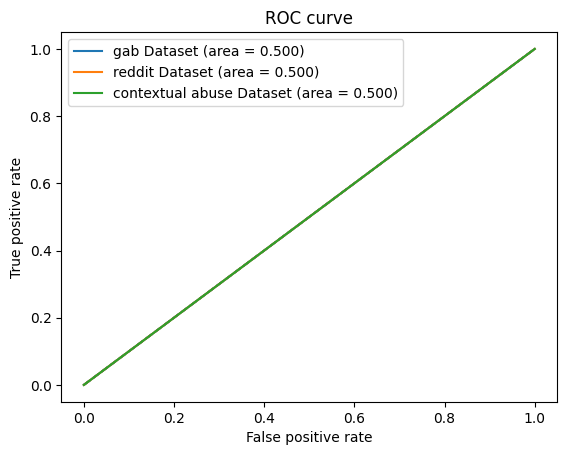

In [170]:
# plot the tpr and fpr
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprg, tprg, label='gab Dataset (area = {:.3f})'.format(aucg))
plt.plot(fprg, tprg, label='reddit Dataset (area = {:.3f})'.format(aucr))
plt.plot(fprg, tprg, label='contextual abuse Dataset (area = {:.3f})'.format(aucc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

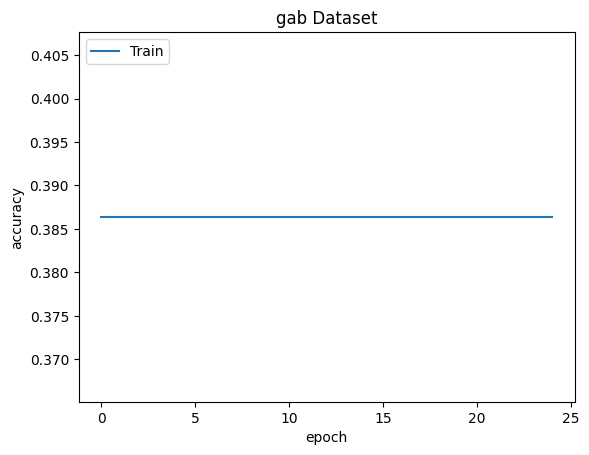

In [179]:
plt.plot(hist.history['accuracy'])
plt.title('gab Dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

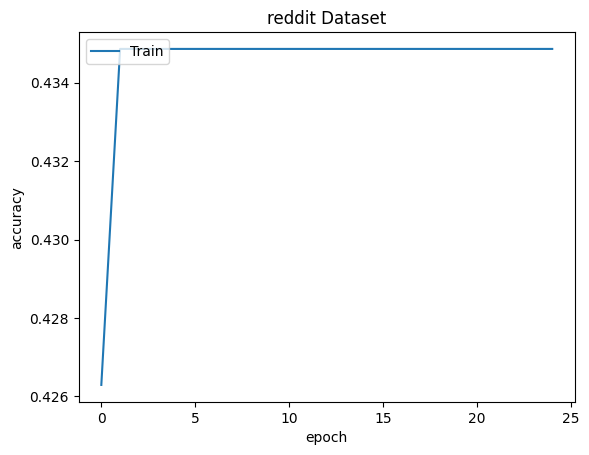

In [180]:
plt.plot(redr.history['accuracy'])
plt.title('reddit Dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

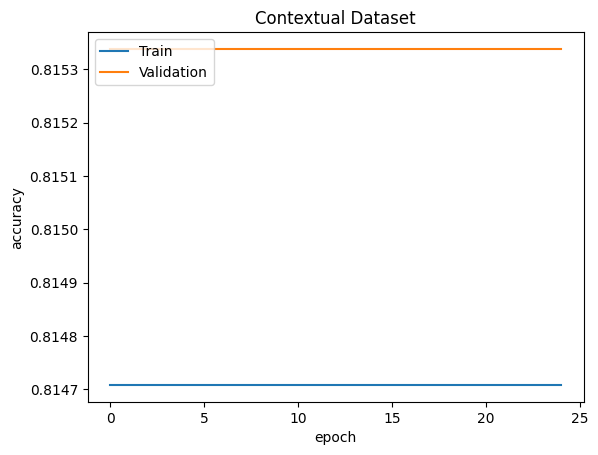

In [181]:
plt.plot(ch.history['accuracy'])
plt.plot(ch.history['val_accuracy'])
plt.title('Contextual Dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()